## Pandas Recap

In [1]:
import pandas as pd
import numpy as np

## 1. Series

In [2]:
# initializing a series as a dictionary
indicies = ['a', 'b', 'c']
data = [10,20,30]
s1 = pd.Series(data, indicies)
s1

a    10
b    20
c    30
dtype: int64

In [3]:
s2 = pd.Series(data)
s2

0    10
1    20
2    30
dtype: int64

In [4]:
s3 = pd.Series({'a':10, 'b':20, 'c':30})
s3

a    10
b    20
c    30
dtype: int64

In [5]:
s1['a'] = s1['a'] ** 3

In [6]:
s1

a    1000
b      20
c      30
dtype: int64

In [7]:
s1 + s3

a    1010
b      40
c      60
dtype: int64

In [8]:
s1 + s2

a   NaN
b   NaN
c   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

In [9]:
s1.sum()

1050

In [10]:
s1.product()

600000

## 2. DataFrames

### 2.1 Initializing and loc

In [11]:
df = pd.DataFrame(np.random.rand(3,5),
                  ['A', 'B', 'C'], 
                  ['price', 'volume', 'return', 'open', 'close'])
df

,price,volume,return,open,close
A,0.638585,0.510989,0.130312,0.653001,0.364274
B,0.646201,0.932677,0.194380,0.394443,0.427664
C,0.716043,0.835974,0.297382,0.672268,0.438780


In [12]:
df['price']

A    0.638585
B    0.646201
C    0.716043
Name: price, dtype: float64

In [13]:
df.loc['A']

price     0.638585
volume    0.510989
return    0.130312
open      0.653001
close     0.364274
Name: A, dtype: float64

In [14]:
df['volume']['C']

0.8359736669583225

In [15]:
df.loc['C', 'volume']

0.8359736669583225

In [16]:
df.iloc[2,1]

0.8359736669583225

### 2.2 Multi-Dimensional Hierachical Indexing

In [17]:
out = ['CAN', 'CAN', 'CAN', 'FR', 'FR', 'FR', 'USA', 'USA', 'USA']
inside = ['MORNING', 'MIDDAY', 'EVENING', 'MORNING', 'MIDDAY', 'EVENING', 'MORNING', 'MIDDAY', 'EVENING']
idxzip = zip(out, inside)
indexRows = pd.MultiIndex.from_tuples(idxzip)
df2 = pd.DataFrame(np.random.rand(9,3), indexRows, ['price', 'close', 'open'])

In [18]:
df2

price     close      open
CAN MORNING  0.048495  0.192432  0.951430
    MIDDAY   0.360391  0.658626  0.536663
    EVENING  0.631125  0.330316  0.547540
FR  MORNING  0.471163  0.437288  0.372640
    MIDDAY   0.471932  0.447665  0.711506
    EVENING  0.012559  0.290532  0.760710
USA MORNING  0.150100  0.442317  0.640274
    MIDDAY   0.967930  0.037712  0.922837
    EVENING  0.042923  0.975885  0.082247

In [19]:
df2.loc['CAN', 'MORNING']['price']

0.04849450540393341

### 2.3 Boolean Operations

In [20]:
df

,price,volume,return,open,close
A,0.638585,0.510989,0.130312,0.653001,0.364274
B,0.646201,0.932677,0.194380,0.394443,0.427664
C,0.716043,0.835974,0.297382,0.672268,0.438780


In [21]:
df[df>0.5]

,price,volume,return,open,close
A,0.638585,0.510989,NaN,0.653001,NaN
B,0.646201,0.932677,NaN,NaN,NaN
C,0.716043,0.835974,NaN,0.672268,NaN


In [22]:
df[(df < 0.3) | (df > 0.9)]

,price,volume,return,open,close
A,NaN,NaN,0.130312,NaN,NaN
B,NaN,0.932677,0.194380,NaN,NaN
C,NaN,NaN,0.297382,NaN,NaN


In [23]:
df[(df > 0.3) & (df < 0.9)]

,price,volume,return,open,close
A,0.638585,0.510989,NaN,0.653001,0.364274
B,0.646201,NaN,NaN,0.394443,0.427664
C,0.716043,0.835974,NaN,0.672268,0.438780


### 2.4 Aggregate Functions

In [24]:
np.random.rand(9)

array([0.41081718, 0.45095219, 0.58253336, 0.98064195, 0.96309898,
       0.69541284, 0.79484352, 0.02832895, 0.69271605])

In [25]:
dictionary = {'Country' : ['UK', 'UK', 'FR', 'FR', 'CAN', 'CAN', 'USA', 'USA'],
              'Stock Price' : np.random.rand(8)*100, 
              'Sales' : np.random.rand(8)*100, 
}
df = pd.DataFrame(dictionary)

In [26]:
df

,Country,Stock Price,Sales
0,UK,39.378163,13.565146
1,UK,5.404752,58.565759
2,FR,44.366322,72.807617
3,FR,52.584823,70.791093
4,CAN,2.959242,31.331477
5,CAN,77.670980,56.641979
6,USA,78.929836,45.549458
7,USA,64.731380,94.053137


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      8 non-null      object 
 1   Stock Price  8 non-null      float64
 2   Sales        8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


In [28]:
df.describe()

,Stock Price,Sales
count,8.000000,8.000000
mean,45.753187,55.413208
std,29.345627,25.275683
min,2.959242,13.565146
25%,30.884810,41.994963
50%,48.475573,57.603869
75%,67.966280,71.295224
max,78.929836,94.053137


In [29]:
df.describe().loc['min', 'Sales']

13.565145892670461

In [30]:
df.groupby('Country').describe().T

Country                  CAN         FR         UK        USA
Stock Price count   2.000000   2.000000   2.000000   2.000000
            mean   40.315111  48.475573  22.391458  71.830608
            std    52.829177   5.811358  24.022829  10.039825
            min     2.959242  44.366322   5.404752  64.731380
            25%    21.637176  46.420947  13.898105  68.280994
            50%    40.315111  48.475573  22.391458  71.830608
            75%    58.993046  50.530198  30.884810  75.380222
            max    77.670980  52.584823  39.378163  78.929836
Sales       count   2.000000   2.000000   2.000000   2.000000
            mean   43.986728  71.799355  36.065452  69.801297
            std    17.897228   1.425898  31.820239  34.297280
            min    31.331477  70.791093  13.565146  45.549458
            25%    37.659103  71.295224  24.815299  57.675377
            50%    43.986728  71.799355  36.065452  69.801297
            75%    50.314353  72.303486  47.315606  81.927217
            max    56.641979  72.807617  58.565759  94.053137

In [31]:
df.groupby('Country').max()

,Stock Price,Sales
Country,,
CAN,77.670980,56.641979
FR,52.584823,72.807617
UK,39.378163,58.565759
USA,78.929836,94.053137


### 2.5 Concatenation and Merging

In [32]:
df1 = pd.DataFrame({'A': [1,2,3,4],
                    'B': [10,20,30,40],
                    'C': [100,200,300,400]})
df2 = pd.DataFrame({'A': [5,6,7,8],
                    'B': [50,60,70,80],
                    'C': [500,600,700,800]})
df3 = pd.DataFrame({'A': [9,10,11,12],
                    'B': [90,100,110,120],
                    'C': [900,1000,1100,1200]})

In [33]:
big_df = pd.concat([df1, df2, df3], axis=1)
big_df

,A,B,C,A,B,C,A,B,C
0,1,10,100,5,50,500,9,90,900
1,2,20,200,6,60,600,10,100,1000
2,3,30,300,7,70,700,11,110,1100
3,4,40,400,8,80,800,12,120,1200


In [34]:
big_df = pd.concat([df1, df2, df3], axis=0)
big_df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
0,5,50,500
1,6,60,600
2,7,70,700
3,8,80,800
0,9,90,900
1,10,100,1000


In [35]:
df1 = pd.DataFrame({'A': [1,2,3,4],
                    'B': [10,20,30,40],
                    'C': [100,200,300,400]})
df2 = pd.DataFrame({'C': [100,200,300,400],
                    'D': [5,6,7,8],
                    'E': [50,60,70,80]})


In [36]:
pd.concat([df1,df2], axis=1)

,A,B,C,C,D,E
0,1,10,100,100,5,50
1,2,20,200,200,6,60
2,3,30,300,300,7,70
3,4,40,400,400,8,80


In [37]:
pd.merge(df1,df2)

,A,B,C,D,E
0,1,10,100,5,50
1,2,20,200,6,60
2,3,30,300,7,70
3,4,40,400,8,80


### 2.6 Unique Values

In [38]:
df = pd.DataFrame({'a': [1,2,3,4],
                    'b': [5,5,5,5],
                    'c': [6,7,8,9]})
df

,a,b,c
0,1,5,6
1,2,5,7
2,3,5,8
3,4,5,9


In [39]:
df.loc[:, 'c'].nunique()

4

In [40]:
df['c'].value_counts()

6    1
7    1
8    1
9    1
Name: c, dtype: int64

In [41]:
df.loc[:, 'c'].nunique()

4

In [42]:
df.nunique()

a    4
b    1
c    4
dtype: int64

### 2.7 Functions

In [43]:
def multiplyThree(x):
    return x*3

In [44]:
multiplyThree(df)

,a,b,c
0,3,15,18
1,6,15,21
2,9,15,24
3,12,15,27


In [45]:
multiplyThree(df['c'])

0    18
1    21
2    24
3    27
Name: c, dtype: int64

In [46]:
df.apply(multiplyThree)

,a,b,c
0,3,15,18
1,6,15,21
2,9,15,24
3,12,15,27


In [47]:
df['b'].apply(lambda x:x**2 + 1)

0    26
1    26
2    26
3    26
Name: b, dtype: int64

### 2.8 Removing Rows/Columns

In [48]:
df.drop('b', axis=1)

,a,c
0,1,6
1,2,7
2,3,8
3,4,9


In [49]:
df.drop(3)

,a,b,c
0,1,5,6
1,2,5,7
2,3,5,8


In [50]:
df.drop('c', axis=1, inplace=True)
df

,a,b
0,1,5
1,2,5
2,3,5
3,4,5


### 2.9 Visualization

In [122]:
df = pd.DataFrame(np.random.rand(100,2), columns=['A', 'B'])

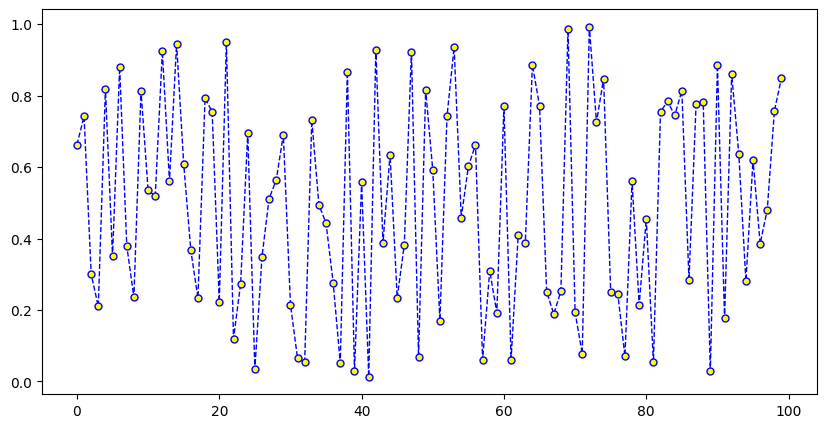

In [123]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(df['A'], linestyle='--', color='blue', linewidth=1, marker='.', 
             markersize=10, markerfacecolor='yellow');

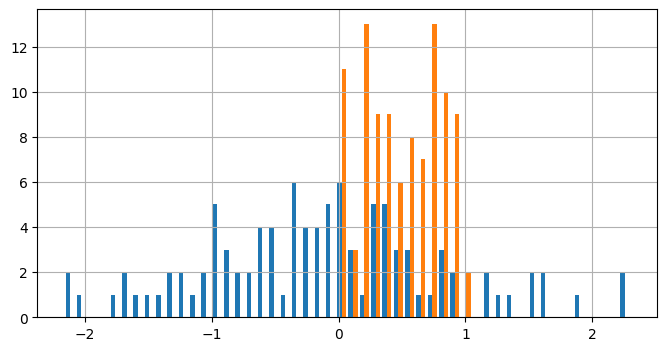

In [124]:
df2 = pd.DataFrame(np.random.randn(100,2))
plt.figure(figsize=(8,4))
plt.hist([df2[1], df['A']], bins=50);
plt.grid()

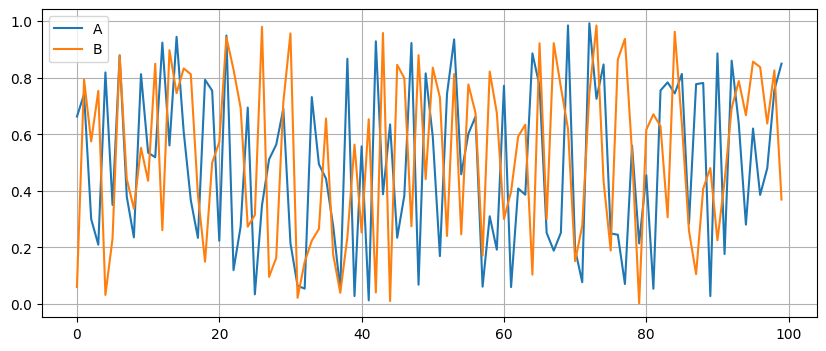

In [134]:
plt.figure(figsize=(10,4))
plt.plot('A', data=df)
plt.plot('B', data=df)
plt.legend()
plt.grid()
plt.show();

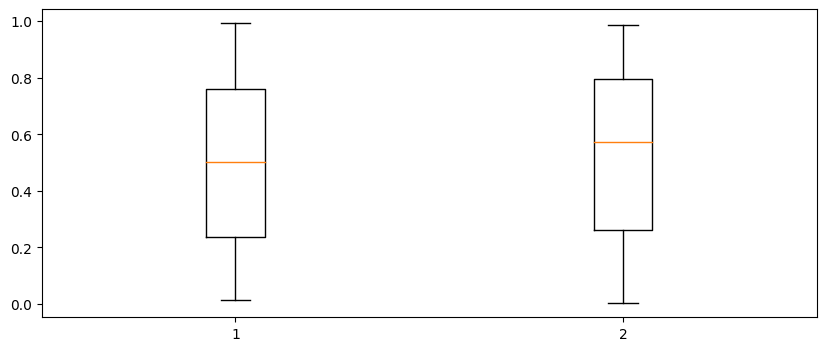

In [137]:
plt.figure(figsize=(10,4))
plt.boxplot(df);

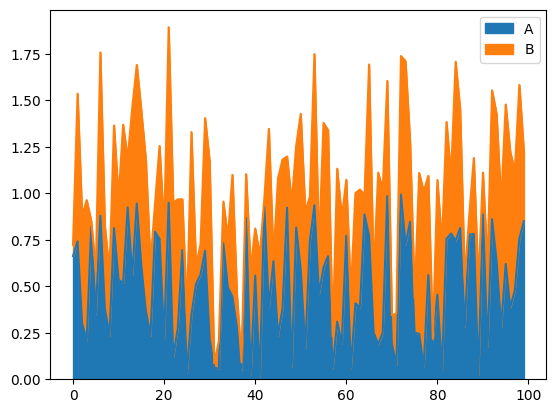

In [143]:
df.plot.area();

# Numpy Recap

### 1. Numpy Basics

In [148]:
a = np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [149]:
type(a)

numpy.ndarray

In [152]:
a[:2]

array([1, 2])

In [153]:
a.shape

(5,)

In [207]:
A = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
A = A.astype(int)

In [208]:
A.shape

(3, 4)

In [209]:
A[2,3]

12

In [210]:
A[1:, 1:3]

array([[ 6,  7],
       [10, 11]])

In [212]:
A[2,3] = 250
A

array([[  1,   2,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11, 250]])

In [182]:
I = np.eye(2)
I

array([[1., 0.],
       [0., 1.]])

In [188]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [189]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [197]:
C = np.full((5,5), np.nan)
C

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [203]:
X = np.random.random((100000,1)) # uniform distribution
print(X)
print()
print('Mean and std')
print(np.mean(X)) # should be 0.5 
print(np.std(X)**2) # should be close to 1/12

[[0.32713278]
 [0.30479682]
 [0.96565883]
 ...
 [0.71431065]
 [0.72525374]
 [0.62648713]]

Mean and std
0.5010708348218337
0.08358617272643504


In [213]:
A.dtype

dtype('int64')

### 2. Basic Arithmetic Operations

In [233]:
A = np.array([[1,5,6], [1,8,9], [1,-1,6]])
B = np.array([[4,8,4], [1,1,5], [6,-8,4]])

In [234]:
A

array([[ 1,  5,  6],
       [ 1,  8,  9],
       [ 1, -1,  6]])

In [235]:
B

array([[ 4,  8,  4],
       [ 1,  1,  5],
       [ 6, -8,  4]])

In [236]:
np.add(A, B, dtype=float)

array([[ 5., 13., 10.],
       [ 2.,  9., 14.],
       [ 7., -9., 10.]])

In [237]:
np.subtract(B, A, dtype=float)

array([[ 3.,  3., -2.],
       [ 0., -7., -4.],
       [ 5., -7., -2.]])

In [238]:
np.multiply(A, B, dtype=float) # point wise multiplication

array([[ 4., 40., 24.],
       [ 1.,  8., 45.],
       [ 6.,  8., 24.]])

In [242]:
C = np.divide(A, B) # point wise division
C

array([[0.25      , 0.625     , 1.5       ],
       [1.        , 8.        , 1.8       ],
       [0.16666667, 0.125     , 1.5       ]])

In [245]:
np.int64(C)

array([[0, 0, 1],
       [1, 8, 1],
       [0, 0, 1]])

### 3. Matrix Products

In [239]:
np.matmul(A, B, dtype=float) # matrix multiplcation

array([[ 45., -35.,  53.],
       [ 66., -56.,  80.],
       [ 39., -41.,  23.]])

In [250]:
a = A[:, 0]
b = B[:, 0]

a

array([1, 1, 1])

In [251]:
b

array([4, 1, 6])

In [252]:
np.matmul(a, b)

11

In [254]:
np.dot(a, b) # dot product

11

In [255]:
np.inner(a, b) # inner product

11

In [257]:
np.matmul(A, A)

array([[ 12,  39,  87],
       [ 18,  60, 132],
       [  6,  -9,  33]])

In [259]:
np.linalg.matrix_power(A, 2)

array([[ 12,  39,  87],
       [ 18,  60, 132],
       [  6,  -9,  33]])

### 4. Matrix Decompositions

#### QR Decomposition

$$ A = QR $$

where Q is a orthonomal matrix and R is an upper triangular matrix

In [260]:
A

array([[ 1,  5,  6],
       [ 1,  8,  9],
       [ 1, -1,  6]])

In [261]:
Q, R = np.linalg.qr(A)

In [262]:
Q

array([[-0.57735027, -0.15430335, -0.80178373],
       [-0.57735027, -0.6172134 ,  0.53452248],
       [-0.57735027,  0.77151675,  0.26726124]])

In [263]:
R

array([[ -1.73205081,  -6.92820323, -12.12435565],
       [  0.        ,  -6.4807407 ,  -1.8516402 ],
       [  0.        ,   0.        ,   1.60356745]])

In [264]:
np.matmul(Q, R)

array([[ 1.,  5.,  6.],
       [ 1.,  8.,  9.],
       [ 1., -1.,  6.]])

#### Eigenvalue Decomposition

$$ A = PDP^{-1} $$

where P's columns consists of the eigenvectors of A and D is a diagonal matrix whose entries are the eigenvalues of A

In [272]:
A

array([[ 1,  5,  6],
       [ 1,  8,  9],
       [ 1, -1,  6]])

In [265]:
d, P = np.linalg.eig(A)

In [266]:
d

array([0.32598999+0.j        , 7.33700501+1.17676556j,
       7.33700501-1.17676556j])

In [267]:
P

array([[-0.98472698+0.j        ,  0.53851429+0.00214369j,
         0.53851429-0.00214369j],
       [-0.06233426+0.j        ,  0.82690915+0.j        ,
         0.82690915-0.j        ],
       [ 0.16256452+0.j        , -0.1207501 +0.10788161j,
        -0.1207501 -0.10788161j]])

In [269]:
D = np.diag(d)
D

array([[0.32598999+0.j        , 0.        +0.j        ,
        0.        +0.j        ],
       [0.        +0.j        , 7.33700501+1.17676556j,
        0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        7.33700501-1.17676556j]])

In [271]:
np.real(np.matmul(np.matmul(P, D), np.linalg.inv(P)))

array([[ 1.,  5.,  6.],
       [ 1.,  8.,  9.],
       [ 1., -1.,  6.]])

#### Singular Value Decomposition 

$$ A = USV^T $$

In [276]:
A

array([[ 1,  5,  6],
       [ 1,  8,  9],
       [ 1, -1,  6]])

In [279]:
U, s, V_t = np.linalg.svd(A)
S = np.diag(s)

np.matmul(np.matmul(U, S), V_t)

array([[ 1.,  5.,  6.],
       [ 1.,  8.,  9.],
       [ 1., -1.,  6.]])

### 5. Matrix Norms

In [280]:
np.linalg.norm(A) # L2 norm

15.684387141358123

In [281]:
np.linalg.det(A)

17.999999999999996

In [283]:
np.linalg.matrix_rank(A)

3

In [284]:
np.trace(A)

15

### 6. Solving Equations

$$ Ax=b $$

In [285]:
A

array([[ 1,  5,  6],
       [ 1,  8,  9],
       [ 1, -1,  6]])

In [288]:
b = np.random.random((3,1))
b

array([[0.24099995],
       [0.52111803],
       [0.76605759]])

In [289]:
np.linalg.solve(A, b)

array([[-0.40674582],
       [-0.08750961],
       [ 0.1808823 ]])

In [290]:
np.matmul(np.linalg.inv(A), b)

array([[-0.40674582],
       [-0.08750961],
       [ 0.1808823 ]])